# Illustrations of the Distribution class
Author: Michael D. Shields  
Date: 8/16/18     
Last modified on 4/23/2020 by Audrey Olivier

This examples shows the use of the Distribution class. In particular:
- How to define and use one of the univariate distributions supported by UQpy,
- How to define a custom distribution,
- How to define a multivariate distribution by 1) giving a list of independent marginals or 2) giving a list of marginals and a copula to model the dependence structure.

Import the necessary modules. Note that the user only needs to make use of the Distribution class of the Distributions module.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [13]:
from scipy.stats import binom
y = binom.pdf([0, 1], n=2, p=4)

AttributeError: 'binom_gen' object has no attribute 'pdf'

## Example of a univariate lognormal distribution
Define a univariate lognormal distribution, call its methods to compute its pdf, cdf, icdf, moments and samples random variables.

In [2]:
from UQpy.Distributions import Lognormal, Normal
dist = Lognormal(params=[1,0,np.exp(5)])
print(dist)
print(dist.params)

[1, 0, 148.4131591025766]


Plot the pdf of the distribution. 
Important notes: <br> 
- If the object has been created, params are fixed and cannot be changed. Alternatively, one can call the method without creating the object. <br>
- The points x at which to evaluate the pdf or log_pdf must be provided as a 2D ndarray of shape (nsamples, dimension).<br>

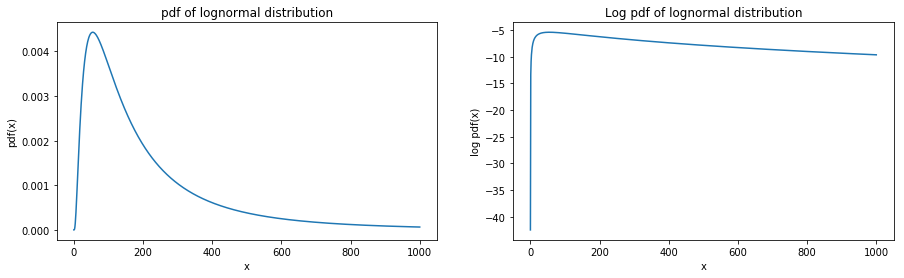

In [3]:
x = np.linspace(0.01,1000,1000).reshape((-1, 1))   # Use reshape to provide a 2D array (1000, 1)
fig, ax = plt.subplots(ncols=2, figsize = (15,4))
ax[0].plot(x, dist.pdf(x))   # Do not give params
ax[0].set_xlabel('x')
ax[0].set_ylabel('pdf(x)')
ax[0].set_title('pdf of lognormal distribution')

ax[1].plot(x, dist.log_pdf(x))
ax[1].set_xlabel('x')
ax[1].set_ylabel('log pdf(x)')
ax[1].set_title('Log pdf of lognormal distribution')
plt.show()

In [4]:
print(dist.pdf(x[:2,:]))
print(dist.pdf(x[:2,:], params=[1,0,np.exp(5)]))

[3.69027606e-19 1.55307432e-06]


TypeError: pdf() got an unexpected keyword argument 'params'

The user must provide x as a 2D array (nsamples, dimension) - the result of pdf or log_pdf will be a 1D array (nsamples, ).

In [5]:
print('Evaluate log pdf at a single point: ')
x = np.array([[100.]])
print(x)
print(dist.pdf(x))

print()
print('Evaluate log pdf at an array of three points: ')
x = np.array([[100.], [200.], [250.]])
print(x)
print(dist.pdf(x))

print()
print('Evaluate log pdf at an array of three points: ')
x = np.array([100., 200., 250.])
print(x)
print(dist.pdf(x))

Evaluate log pdf at a single point: 
[[100.]]
[0.00369028]

Evaluate log pdf at an array of three points: 
[[100.]
 [200.]
 [250.]]
[0.00369028 0.0019079  0.00139291]

Evaluate log pdf at an array of three points: 
[100. 200. 250.]
[0.00369028 0.0019079  0.00139291]


Print the mean, standard deviation, skewness, and kurtosis of the distribution.  
Notice that, when calling the moments method, the parameters are inherited from the class if they are not specified. If the parameters are specified, then they overwrite the parameters in the defined class.

In [6]:
moments_list = ['mean', 'variance', 'skewness', 'kurtosis']
m = dist.moments()
print('Moments with inherited parameters:')
for i, moment in enumerate(moments_list):
    print(moment+' = {0:.2f}'.format(m[i]))

Moments with inherited parameters:
mean = 244.69
variance = 102880.65
skewness = 6.18
kurtosis = 110.94


Generate 5000 random samples from the lognormal distribution.
Notice that when calling the rvs method, the number of samples must be specified. Again, the parameters can be inherited from the Distribution object or overwritten.

Shape of output provided by rvs is (nsamples, dimension), i.e. here:
(10000, 1)


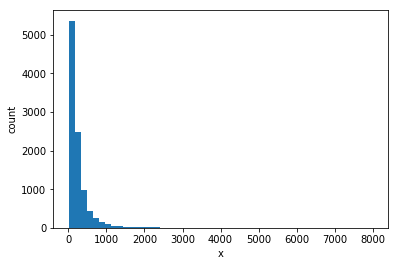

In [7]:
y1 = dist.rvs(nsamples=10000)
print('Shape of output provided by rvs is (nsamples, dimension), i.e. here:')
print(y1.shape)
plt.hist(y1[:, 0], bins=50)
plt.xlabel('x')
plt.ylabel('count')
plt.show()

Estimate the parameters of the lognormal distribution based on the samples generated above. Notice that the fit method returns three parameters (s, loc, and scale) that correspond to the scipy.stats parameters for the distribution. In this example, data y was generated with parameters (1, 0, exp(5)=148), fit should return these values.

In [8]:
print(dist.params)
pfit = dist.fit(x=y1)
print(pfit)

[1, 0, 148.4131591025766]
(0.9911036360120083, -0.009406804885467794, 150.0830441187846)


Alternatively, the parameters can be provided when initializing the distribution.

## Example with a custom distribution

File rosenbrock.py defines a bivariate Rosenbrock distribution. Note that the dist_name input in Distribution should be the name of the file without the .py extension.

In [9]:
from UQpy.Distributions import DistributionNd
class rosenbrock(DistributionNd):
    def __init__(self, params):
        self.params = params
    def pdf(self, x):
        return np.exp(-(100*(x[:, 1]-x[:, 0]**2)**2+(1-x[:, 0])**2)/self.params[0])
    def log_pdf(self, x):
        return -(100*(x[:, 1]-x[:, 0]**2)**2+(1-x[:, 0])**2)/self.params[0]

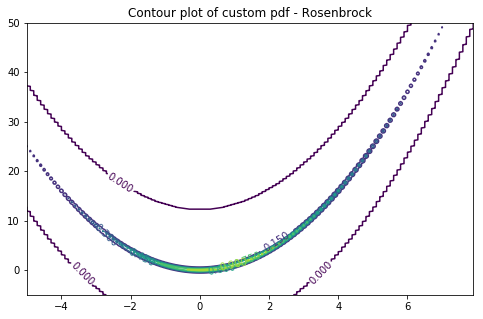

In [10]:
dist = rosenbrock(params=[20])

fig, ax = plt.subplots(figsize=(8,5))
x = np.arange(-5, 8, 0.1)
y = np.arange(-5, 50, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist.pdf(x=np.concatenate([X.reshape((-1, 1)),Y.reshape((-1, 1))], axis=1))
CS = ax.contour(X, Y, Z.reshape(X.shape))
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Contour plot of custom pdf - Rosenbrock')
plt.show()

Try to call the fit method using dummy data. UQpy returns an Attribute error as the fit method is not defined in the rosenbrock.py file. Fit can be performed by maxizing the likelihood, see Inference module.

Same for the rvs method; random samples can be generated using importance sampling or MCMC, see SampleMethods module.

In [11]:
print('Does the rosenbrock distribution have a fit method?')
print(hasattr(dist, 'fit'))

print('Does the rosenbrock distribution have an rvs method?')
print(hasattr(dist, 'rvs'))

print('Does the rosenbrock distribution have an pdf method?')
print(hasattr(dist, 'pdf'))

Does the rosenbrock distribution have a fit method?
False
Does the rosenbrock distribution have an rvs method?
False
Does the rosenbrock distribution have an pdf method?
True


## Example of a multivariate distribution provided with independent marginals

Create a bivariate distribution as a product of two independent univariate distributions: a normal and a lognormal. Then draw some random samples (left plot below) and plot the pdf (right contour plot).

In [14]:
from UQpy.Distributions import normal, joint_iid
marginals = [normal(params=[2, 2]), 
             lognormal(params=[1,0,np.exp(5)])]

dist = joint_iid(marginals=marginals)
print(dist)

In [15]:
print('Evaluate log pdf at a single point: ')
print(dist.log_pdf((np.array([[1., 100.]]))))
print('Evaluate log pdf at an array of two points: ')
print(dist.log_pdf(np.array([[1., 100.], [2., 250.]])))

Evaluate log pdf at a single point: 
[-7.33913972]
Evaluate log pdf at an array of two points: 
[-7.33913972 -8.18844591]


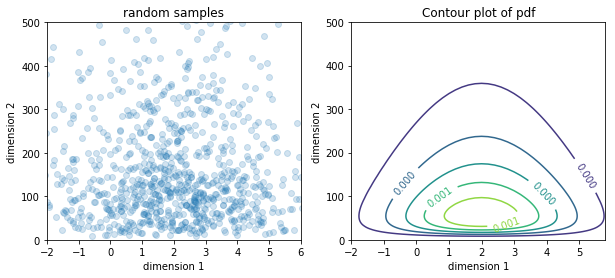

In [16]:
y = dist.rvs(nsamples=1000)
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].scatter(y[:,0], y[:,1], alpha=0.2)
ax[0].set_xlabel('dimension 1')
ax[0].set_ylabel('dimension 2')
ax[0].set_title('random samples')
ax[0].set_ylim([0, 500])
ax[0].set_xlim([-2, 6])

x = np.arange(-2.0, 6.0, 0.2)
y = np.arange(0.01, 500, 1)
X, Y = np.meshgrid(x, y)
Z = dist.pdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1))
CS = ax[1].contour(X, Y, Z.reshape(X.shape))
ax[1].clabel(CS, inline=1, fontsize=10)
ax[1].set_xlabel('dimension 1')
ax[1].set_ylabel('dimension 2')
ax[1].set_title('Contour plot of pdf')
ax[0].set_ylim([0, 500])
ax[0].set_xlim([-2, 6])
plt.show()

## Example of a multivariate distribution provided with marginals and copula

In [17]:
from UQpy.Distributions import Gumbel, joint_copula

marginals = [normal(params=[0, 1]), 
             normal(params=[0, 1])]
copula = Gumbel(copula_params=[2])

In [18]:
# dist_1 is a multivariate normal with independent marginals
dist_1 = joint_iid(marginals)
print('Does the distribution with independent margianls have an rvs method?')
print(hasattr(dist_1, 'rvs'))

# dist_2 exhibits dependence between the two dimensions, defined using a gumbel copula
dist_2 = joint_copula(marginals=marginals, copula=copula)
print('Does the distribution with copula have an rvs method?')
print(hasattr(dist_2, 'rvs'))

ind

Does the distribution with independent margianls have an rvs method?
True
Does the distribution with copula have an rvs method?
False


Compare pdfs for dist_1 and dist_2.

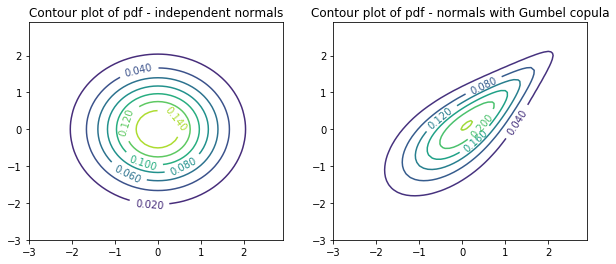

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist_1.pdf(x=np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1))
CS = ax[0].contour(X, Y, Z.reshape(X.shape))
ax[0].clabel(CS, inline=1, fontsize=10)
ax[0].set_title('Contour plot of pdf - independent normals')

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist_2.pdf(x=np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1))
CS = ax[1].contour(X, Y, Z.reshape(X.shape))
ax[1].clabel(CS, inline=1, fontsize=10)
ax[1].set_title('Contour plot of pdf - normals with Gumbel copula')
plt.show()

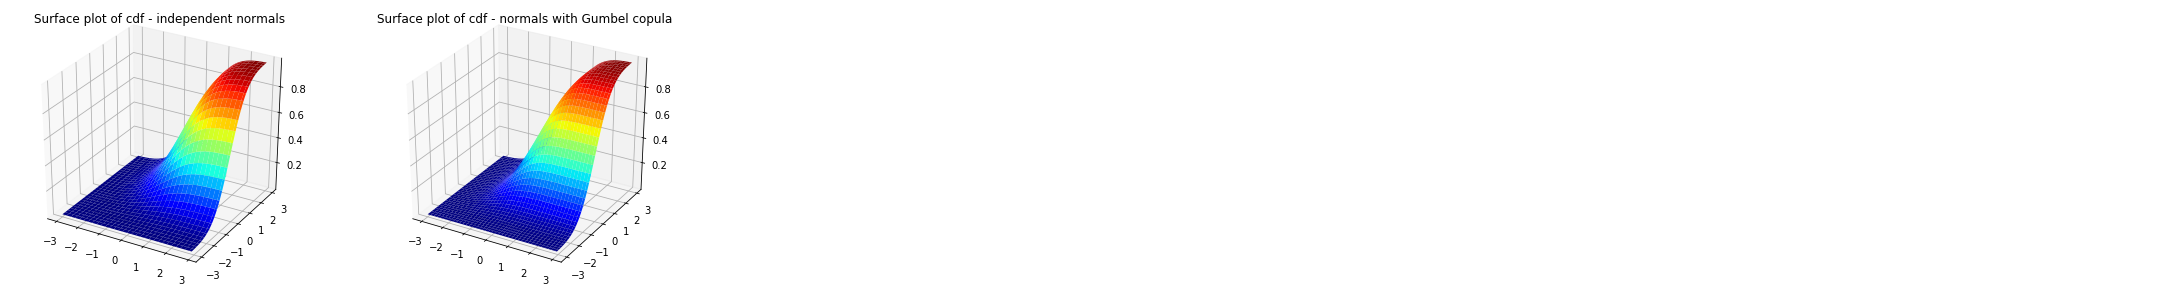

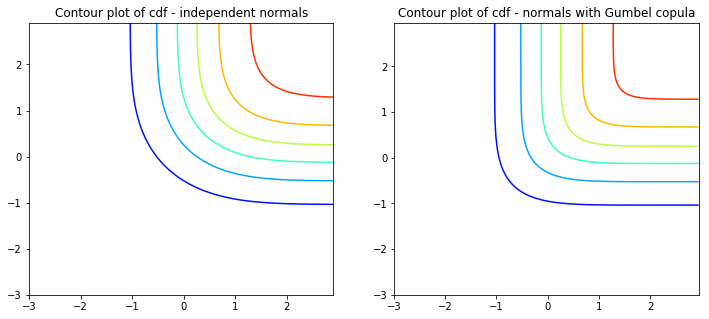

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121, projection='3d')
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist_1.cdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1))
CS = ax.plot_surface(X, Y, Z.reshape(X.shape), cmap='jet')
ax.clabel(CS, inline=1, fontsize=10, color='black')
ax.set_title('Surface plot of cdf - independent normals')

ax = fig.add_subplot(122, projection='3d')
x = np.arange(-3, 3, 0.05)
y = np.arange(-3, 3, 0.05)
X, Y = np.meshgrid(x, y)
Z = dist_2.cdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1))
CS = ax.plot_surface(X, Y, Z.reshape(X.shape), cmap='jet')
ax.clabel(CS, inline=1, fontsize=10, color='black')
ax.set_title('Surface plot of cdf - normals with Gumbel copula')
plt.show()

# contour plots
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist_1.cdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1))
CS = ax.contour(X, Y, Z.reshape(X.shape), cmap='jet')
#ax.clabel(CS, inline=1, fontsize=10, color='black')
ax.set_title('Contour plot of cdf - independent normals')

ax = fig.add_subplot(122)
x = np.arange(-3, 3, 0.05)
y = np.arange(-3, 3, 0.05)
X, Y = np.meshgrid(x, y)
Z = dist_2.cdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1))
CS = ax.contour(X, Y, Z.reshape(X.shape), cmap='jet')
#ax.clabel(CS, inline=1, fontsize=10, color='black')
ax.set_title('Contour plot of cdf - normals with Gumbel copula')
plt.show()